In [11]:
using CSV
using DataFrames
using Plots
using Eirene

In [12]:
trees = DataFrame(CSV.File("tree_export.csv"))
first(trees, 3)

,Point X,Point Y,Street Address,City,Postal Code,Planting Site Width
,Float64,Float64,String?,String?,Int64,Float64?
1,-75.1473,39.9525,401-499 Arch St,Philadelphia,19106,missing
2,-75.1499,39.9535,missing,Philadelphia,19106,missing
3,-75.1527,39.9483,128 S 7th St,Philadelphia,19106,missing


In [13]:
treexy = hcat(trees[:, 1], trees[:, 2])

1127×2 Matrix{Float64}:
 -75.1473  39.9525
 -75.1499  39.9535
 -75.1527  39.9483
 -75.1507  39.9499
 -75.1521  39.9494
 -75.1451  39.9486
 -75.1452  39.9484
 -75.1474  39.9505
 -75.1475  39.949
 -75.1467  39.9494
 -75.1436  39.9508
 -75.1436  39.9509
 -75.1439  39.9508
   ⋮       
 -75.148   39.9488
 -75.1441  39.952
 -75.1467  39.9565
 -75.1483  39.953
 -75.1521  39.951
 -75.145   39.9528
 -75.1461  39.9487
 -75.1451  39.956
 -75.1449  39.9542
 -75.1484  39.9506
 -75.143   39.9519
 -75.1424  39.9559

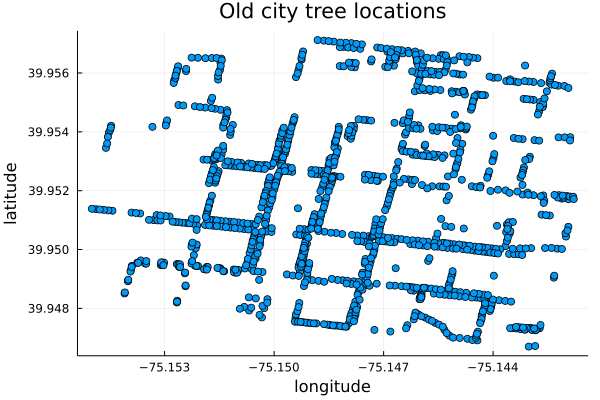

In [14]:
scatter(treexy[:, 1], treexy[:, 2], 
    legend=false, 
    title="Old city tree locations", 
    xlabel = "longitude",
    ylabel = "latitude")

In [15]:
eireneoutput = eirene(transpose(treexy), model = "pc")

Dict{String, Any} with 12 entries:
  "symmat"   => [497678 476836 … 27781 27367; 476836 497678 … 90471 89399; … ; …
  "maxnz"    => [0, 96453, 21986347, 1, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  1119, 1120, 1121, 1122, 112…
  "cyclerep" => [Vector{Int64}[], [[1, 4], [3, 5], [6, 7], [17, 12], [41, 36], …
  "phi"      => [Int64[], [3, 2251, 5615, 12261, 38585, 13370, 106338, 49330, 3…
  "plo"      => [Int64[], [4, 5, 7, 12, 36, 15, 111, 46, 35, 90  …  336, 712, 1…
  "ocg2rad"  => [0.00762834, 0.00762833, 0.00762832, 0.00762831, 0.00762831, 0.…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  1118, 1119, 1120, 1121, 112…
  "nvl2ovl"  => [939, 883, 562, 156, 561, 85, 108, 844, 896, 715  …  710, 591, …
  "input"    => Dict{String, Any}("genera"=>[-75.1473 -75.1499 … -75.143 -75.14…
  "tid"      => [Int64[], [4, 5, 7, 12, 36, 15, 111, 46, 35, 90  …  712, 108, 1…
  "grain"    => [[497678, 497678, 497678, 497678, 497678, 497678, 497678, 49767…

In [16]:
bc = barcode(eireneoutput, dim = 1)

215×2 Matrix{Float64}:
 8.4528e-5    8.89221e-5
 9.15329e-5   9.85381e-5
 0.000107685  0.000128474
 0.000117971  0.000122954
 0.000118202  0.000143312
 0.000119343  0.000131275
 0.000120955  0.000122531
 0.00012695   0.000140245
 0.000129398  0.00013318
 0.000131282  0.00015307
 0.000132269  0.000161726
 0.000135683  0.00014519
 0.000138634  0.000160325
 ⋮            
 0.000870785  0.00102866
 0.000936368  0.000944149
 0.00125338   0.00128625
 0.000139888  0.000168166
 0.000149207  0.000181113
 0.000161568  0.000180005
 0.000192458  0.000252145
 0.000199051  0.00023848
 0.000589153  0.00143353
 0.00063705   0.00154508
 0.000674054  0.00123231
 0.000779706  0.000944937

In [17]:
persistence = bc[:,2] - bc[:, 1]
mpcindex = argmax(persistence)

134

In [18]:
mpctrees = unique(classrep( eireneoutput, class = mpcindex, dim = 1))

80-element Vector{Int64}:
  560
  876
  834
  468
  941
   84
  373
  639
  340
  704
  192
  343
 1077
    ⋮
  435
  954
  140
  264
 1087
 1059
  826
   75
 1031
  549
 1009
  768

In [19]:
mpcxy = treexy[mpctrees, :]

80×2 Matrix{Float64}:
 -75.1487  39.9511
 -75.1487  39.9512
 -75.149   39.9509
 -75.1489  39.951
 -75.149   39.9507
 -75.149   39.9508
 -75.149   39.9509
 -75.1489  39.9511
 -75.1489  39.9512
 -75.1493  39.9507
 -75.1492  39.9507
 -75.1491  39.9507
 -75.1473  39.9497
   ⋮       
 -75.1481  39.949
 -75.1472  39.9501
 -75.1491  39.9504
 -75.1491  39.949
 -75.1492  39.9501
 -75.1492  39.9501
 -75.1477  39.9503
 -75.149   39.949
 -75.1484  39.949
 -75.1493  39.9505
 -75.1477  39.9488
 -75.1476  39.9487

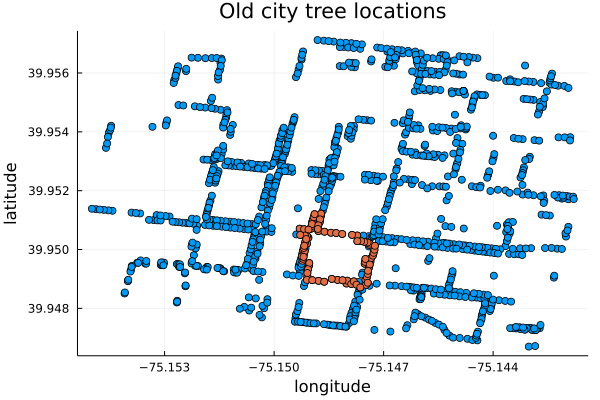

In [20]:
scatter!(mpcxy[:,1], mpcxy[:,2])